In [ ]:
library(car)
library(ResourceSelection)
library(rms)
library(bestglm)
library(boot)

In [43]:
recession <- read.csv(file = 'recession.csv')
attach(recession)

In [44]:
head(recession)

,State,Year,gdp,inc,exp
,<fct>,<int>,<int>,<int>,<int>
1,Alabama,0,39776,29230,26574
2,Alaska,0,75135,39761,37054
3,Arizona,0,46194,31905,29996
4,Arkansas,0,37265,27954,25241
5,California,0,58030,37690,34297
6,Colorado,0,55076,36538,34575


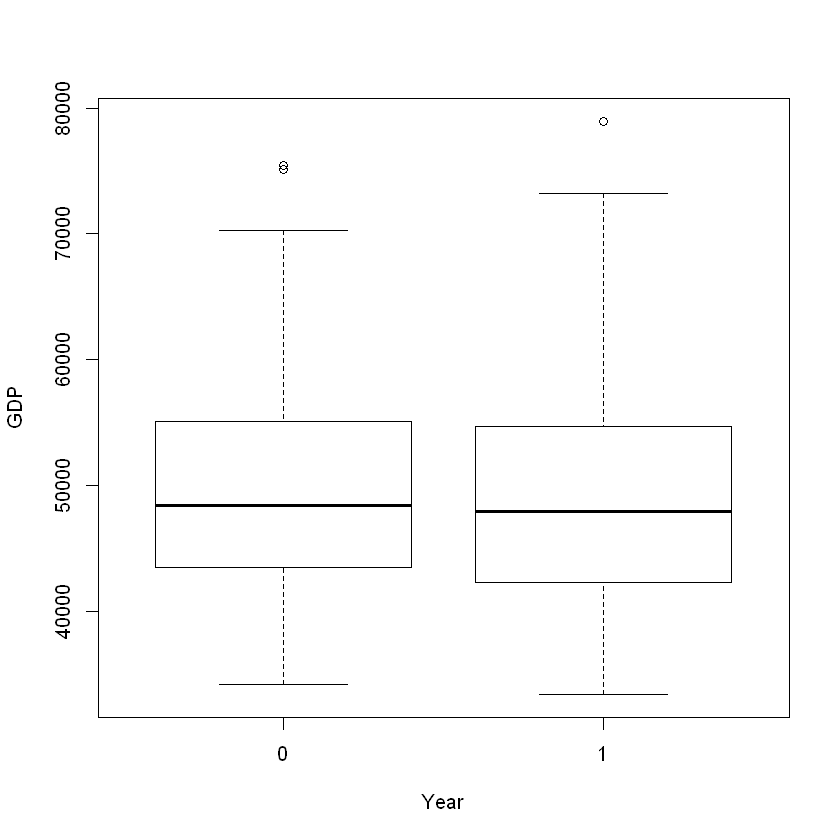

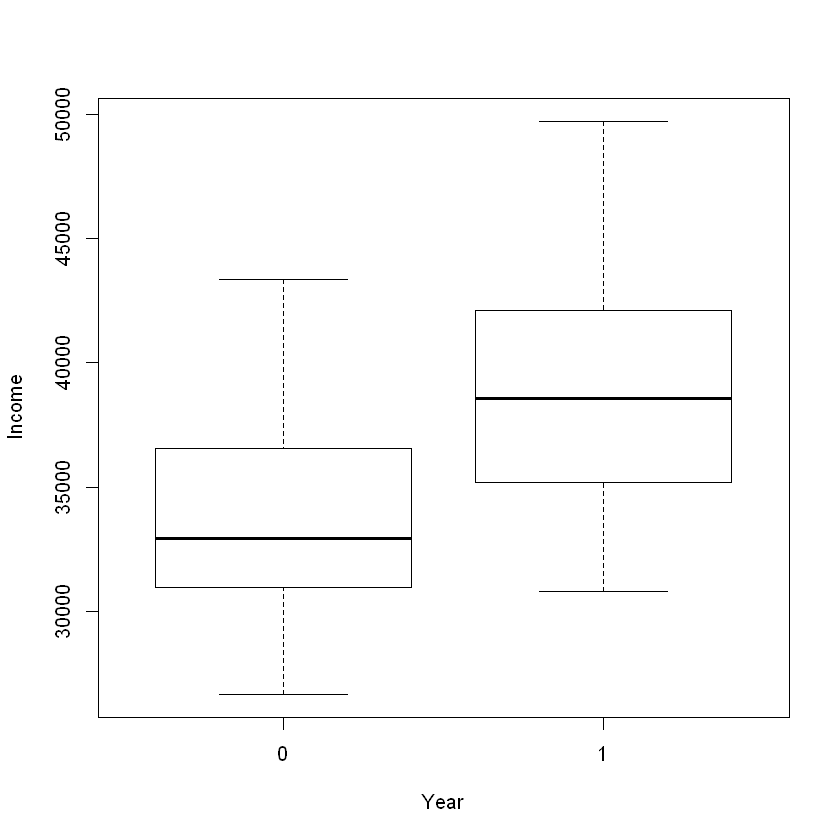

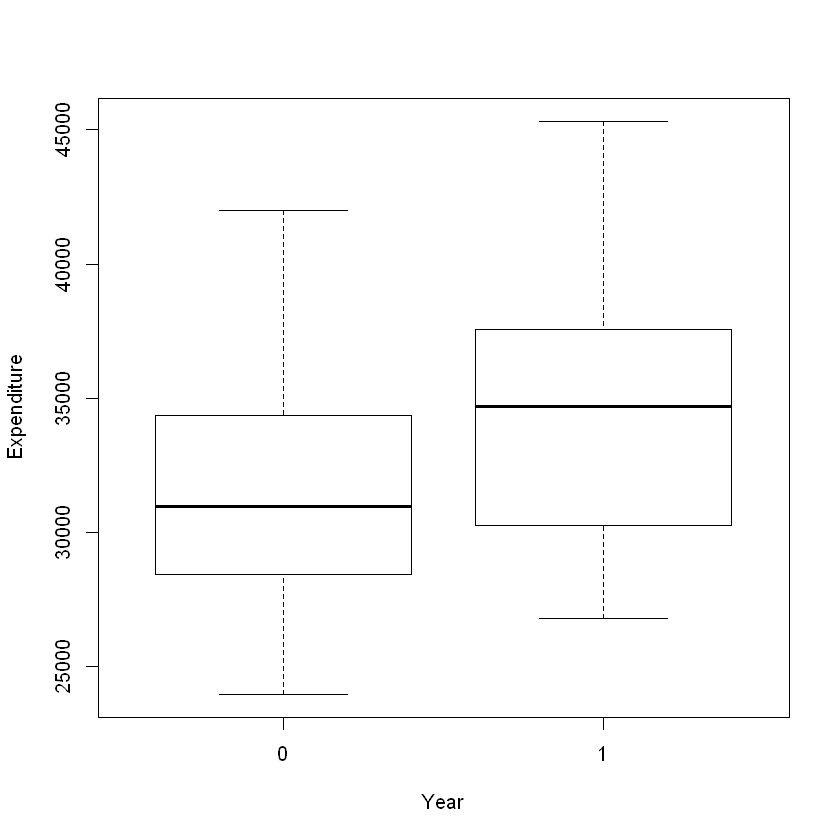

In [125]:
boxplot(gdp ~ Year,xlab="Year",ylab="GDP")
boxplot(inc ~ Year,xlab="Year",ylab="Income")
boxplot(exp ~ Year,xlab="Year",ylab="Expenditure")

In [135]:
recession1 <- glm(Year ~ gdp + inc + exp, family=binomial, maxit=500)
summary(recession1)


Call:
glm(formula = Year ~ gdp + inc + exp, family = binomial, maxit = 500)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.46487  -0.70390   0.00667   0.65876   3.11967  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.444e+00  2.387e+00  -3.957 7.59e-05 ***
gdp         -1.129e-04  3.932e-05  -2.872  0.00407 ** 
inc          6.843e-04  1.633e-04   4.191 2.77e-05 ***
exp         -2.926e-04  1.455e-04  -2.010  0.04440 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 141.402  on 101  degrees of freedom
Residual deviance:  91.711  on  98  degrees of freedom
AIC: 99.711

Number of Fisher Scoring iterations: 6


In [117]:
gstat <- recession1$null.deviance - deviance(recession1)
cbind(gstat, 1-pchisq(gstat,length(coef(recession1))-1))

gstat,
80.82936,0


In [118]:
exp(coef(recession1)[-1])

gdp       inc       exp 
0.9995677 1.0013470 0.9994909

In [119]:
drop1(recession1, test="LRT")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,55.02748,63.02748,NA,NA
gdp,1,103.65574,109.65574,48.628262,3.093785e-12
inc,1,109.67280,115.67280,54.645319,1.443677e-13
exp,1,62.17030,68.17030,7.142818,7.526478e-03


In [120]:
vif(recession1)

gdp       inc       exp 
 6.102002 15.172361  6.767676

In [121]:
hoslem.test(Year, fitted(recession1))


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  Year, fitted(recession1)
X-squared = 18.218, df = 8, p-value = 0.01965


In [122]:
recession1.lrm <- lrm(Year ~ gdp + inc + exp, x=T, y=T)
residuals(recession1.lrm, type="gof")
recession1.lrm$stats
library(leaps)
leaps(cbind(gdp,inc,exp),Year,nbest=2)

Sum of squared errors     Expected value|H0                    SD 
           7.53265334            8.35304139            0.37498286 
                    Z                     P 
          -2.18780145            0.02868407

Obs    Max Deriv   Model L.R.         d.f.            P            C 
98.000000000  0.002655827 80.829364933  3.000000000  0.000000000  0.953352770 
         Dxy        Gamma        Tau-a           R2        Brier            g 
 0.906705539  0.906705539  0.458026510  0.748896963  0.076863810  4.168564197 
          gr           gp 
64.622600166  0.455689017

,1,2,3
1,FALSE,TRUE,FALSE
1,FALSE,FALSE,TRUE
2,TRUE,TRUE,FALSE
2,FALSE,TRUE,TRUE
3,TRUE,TRUE,TRUE


In [85]:
logitbest <- bestglm(data.frame(cbind(gdp, inc, exp),Year), IC="AIC", family=binomial)
logitbest$Subsets

Morgan-Tatar search since family is non-gaussian.



,Intercept,gdp,inc,exp,logLikelihood,AIC
,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
0,TRUE,FALSE,FALSE,FALSE,-69.31472,138.62944
1,TRUE,FALSE,TRUE,FALSE,-57.69595,117.39190
2,TRUE,TRUE,TRUE,FALSE,-31.93688,67.87376
3*,TRUE,TRUE,TRUE,TRUE,-28.60928,63.21855


,spearson2,,
1,-0.432489602,1.544713e-03,0.031977306
2,-0.484270178,6.951070e-03,0.105992981
3,-0.453267663,1.137787e-03,0.021671851
4,-0.392342032,1.459030e-03,0.036528626
5,-0.901822949,7.090272e-03,0.033697180
6,-0.688129121,3.533039e-03,0.028979890
7,-4.548309628,2.156687e-01,0.040031686
8,-0.303968691,1.285724e-03,0.052726115
9,-0.006716855,9.689622e-09,0.000858345
10,-1.109974913,6.325477e-03,0.020123261


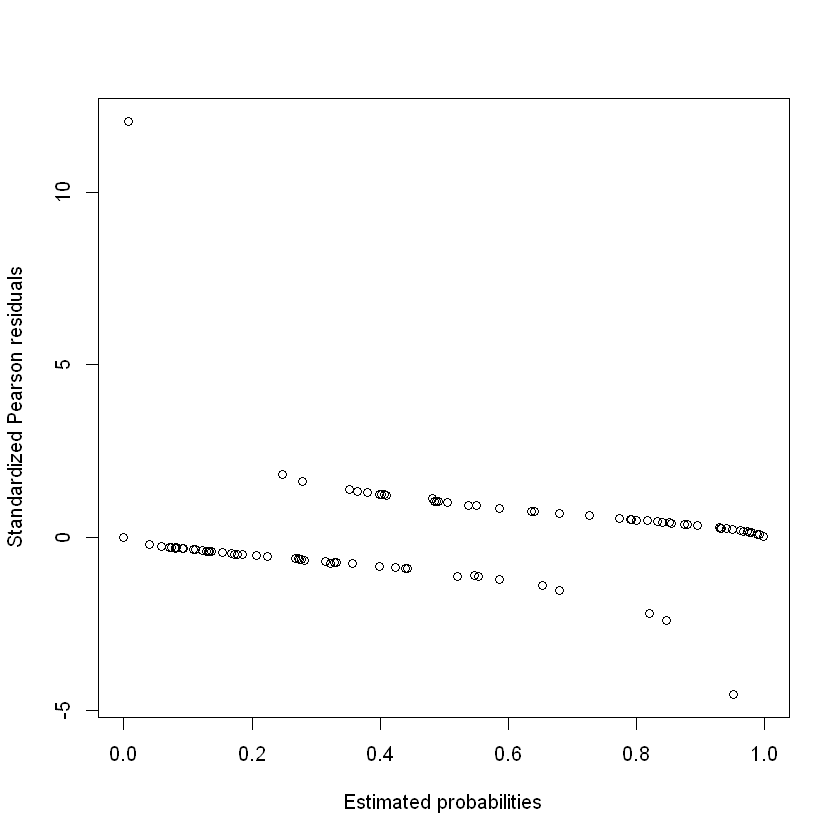

In [138]:
recessiondiag1 <- glm.diag(recession1)
spearson2 <- residuals(recession1, type="pearson")/sqrt(1-recessiondiag1$h)
cbind(spearson2,recessiondiag1$cook,recessiondiag1$h)
plot(fitted(recession1), rstandard(recession1, type="pearson"), xlab="Estimated probabilities", ylab="Standardized Pearson residuals")

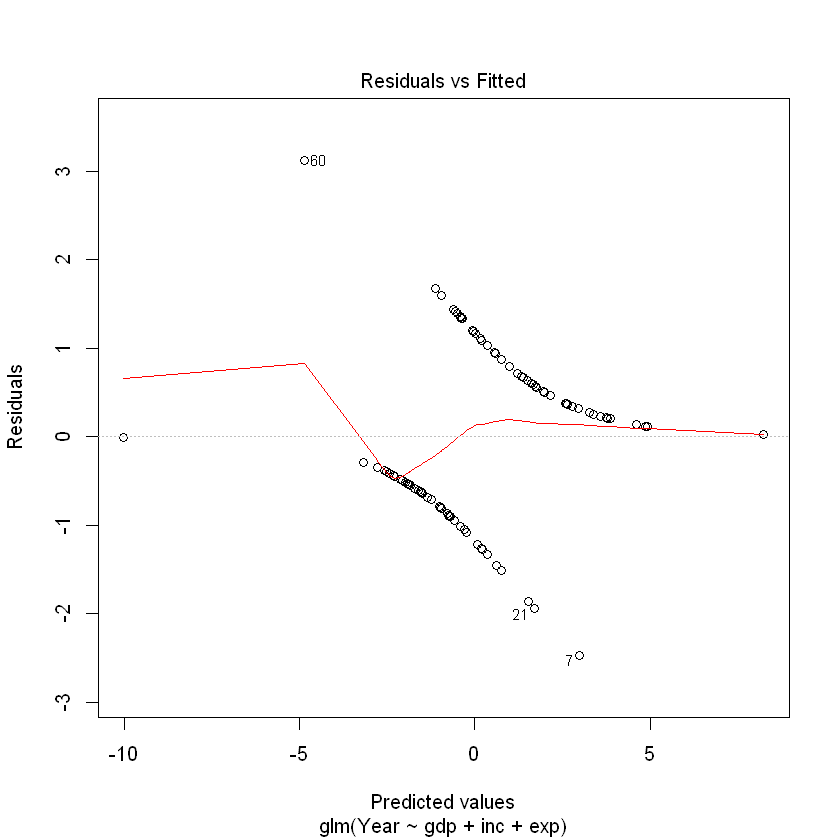

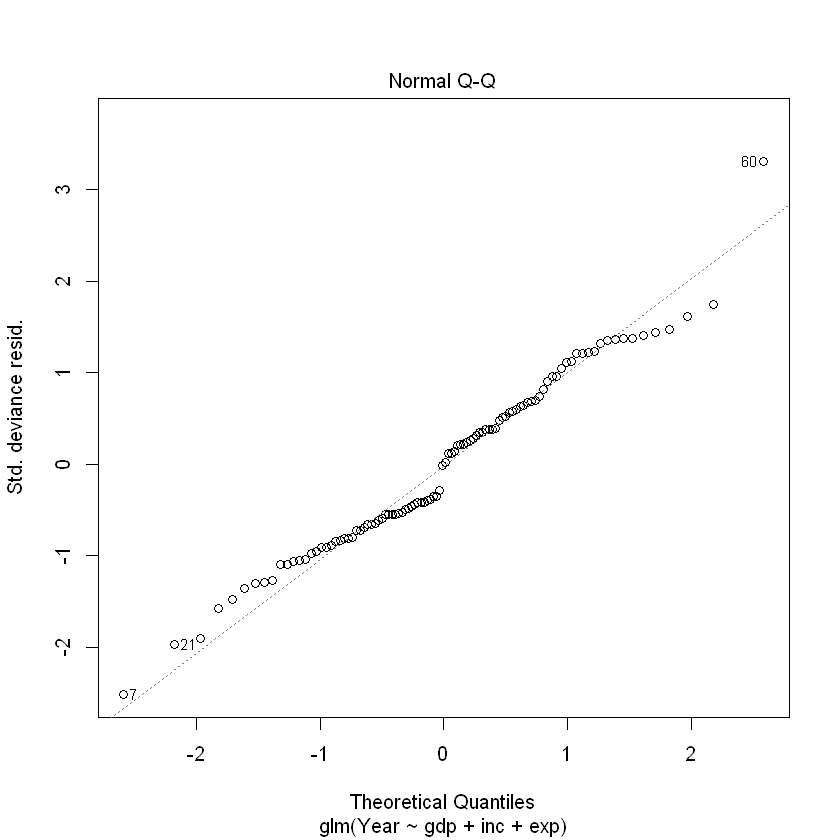

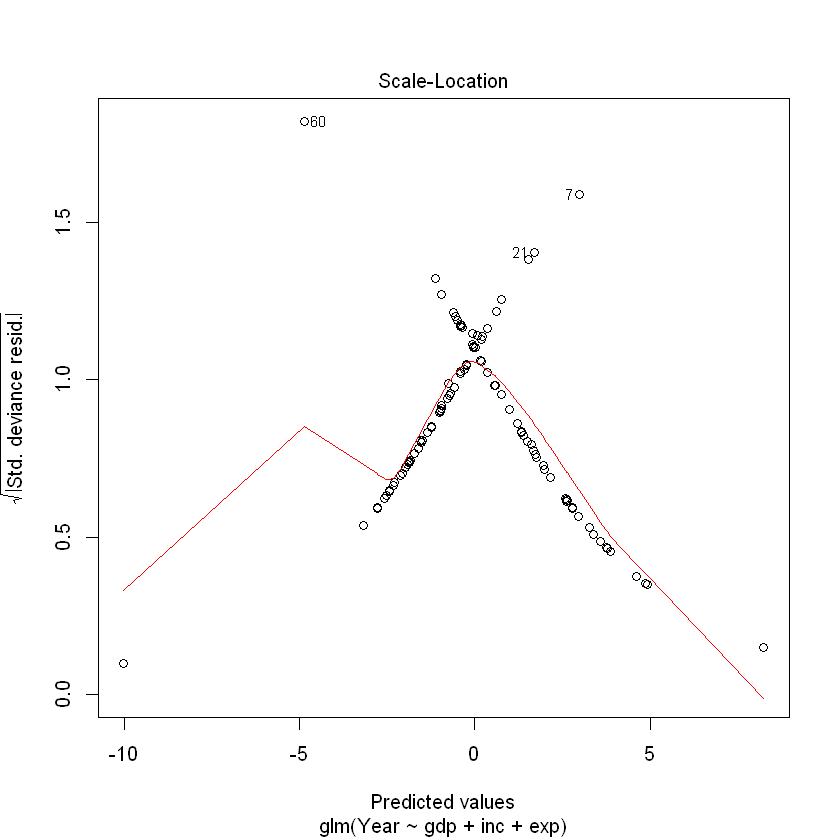

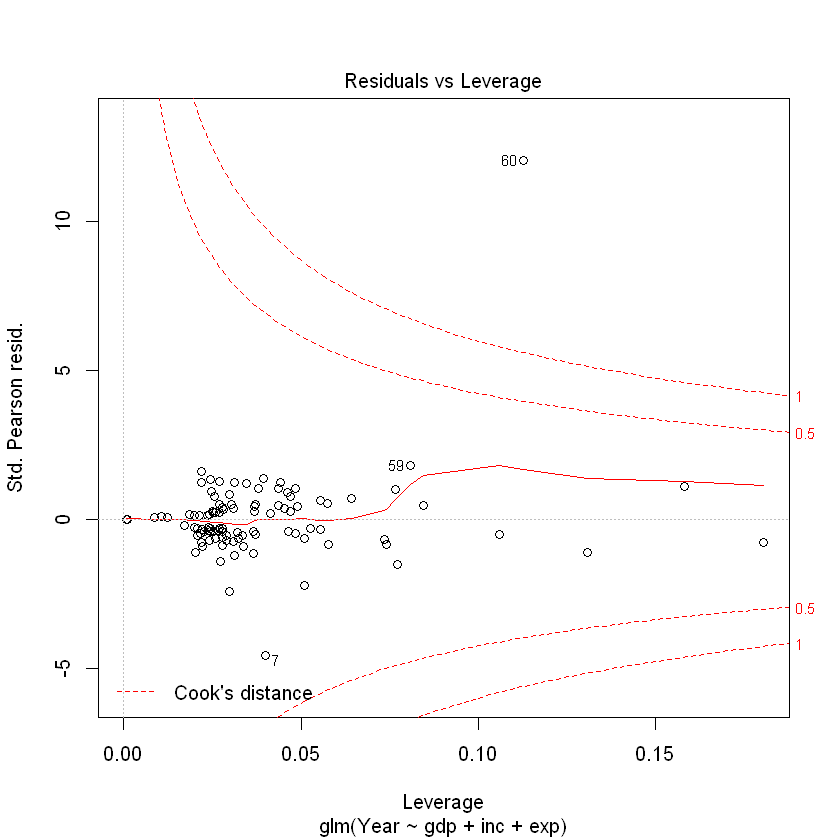

In [137]:
plot(recession1)

In [145]:
recessiondiag1

$res
           1            2            3            4            5            6 
-0.582079109 -0.636817488 -0.608900677 -0.531229112 -1.089599523 -0.877678886 
           7            8            9           10           11           12 
-2.627491091 -0.415549159 -0.009496922 -1.268183329 -0.547614295 -0.899876760 
          13           14           15           16           17           18 
-0.516433274 -1.060190170 -0.396988980 -0.718449840 -0.907217113 -0.413064118 
          19           20           21           22           23           24 
-0.635074879 -0.448930362 -1.983481739 -1.277790561 -0.482398799 -0.807571945 
          25           26           27           28           29           30 
-0.539201179 -0.539924469 -0.385983387 -0.803783807 -0.796058531 -1.569770446 
          31           32           33           34           35           36 
-1.920249865 -0.350539072 -1.030303112 -0.819059619 -0.544498201 -0.438622822 
          37           38           39           40           41           42 
-1.035878086 -0.415400054 -0.947323609 -1.089016200 -0.489722612 -1.347081019 
          43           44           45           46           47           48 
-0.687412381 -0.646650201 -0.286063246 -0.832121833 -1.473500212 -1.288638708 
          49           50           51           52           53           54 
-0.348151992 -0.715565115 -0.940777277  1.110077975  0.277197614  1.407333022 
          55           56           57           58           59           60 
 0.894796484  0.349463296  0.564386172  0.022839968  1.750654094  5.109033013 
          61           62           63           64           65           66 
 0.640826736  1.363228280  0.691817971  1.223946509  0.673227796  0.959144964 
          67           68           69           70           71           72 
 0.593991684  0.234313953  1.374266924  0.729505318  1.288552833  0.121044307 
          73           74           75           76           77           78 
 0.213379323  1.208353947  0.508395576  1.201916939  1.042308879  0.956758965 
          79           80           81           82           83           84 
 0.318916012  1.366639518  0.204190749  0.141385587  1.436542313  0.375264811 
          85           86           87           88           89           90 
 0.811762543  0.217515911  1.122041941  0.383341425  1.354093161  0.471626013 
          91           92           93           94           95           96 
 0.375283343  1.216526016  0.380186595  0.575093546  0.522116637  1.616720274 
          97           98           99          100          101          102 
 0.617829763  0.258173330  0.348540704  1.470831558  0.685878023  0.124350922 

$rd
           1            2            3            4            5            6 
-0.586369820 -0.652543042 -0.611900266 -0.535786917 -1.095567135 -0.882710665 
           7            8            9           10           11           12 
-2.515735822 -0.420891662 -0.009498961 -1.271226066 -0.550843497 -0.904100379 
          13           14           15           16           17           18 
-0.519809115 -1.065153253 -0.398982920 -0.723673955 -0.912639911 -0.415500873 
          19           20           21           22           23           24 
-0.642060897 -0.454971711 -1.969526874 -1.300243281 -0.485114765 -0.812980488 
          25           26           27           28           29           30 
-0.545092951 -0.542798177 -0.388505903 -0.808100593 -0.800656615 -1.573760896 
          31           32           33           34           35           36 
-1.904149740 -0.352248667 -1.040827144 -0.827759139 -0.547604377 -0.440953072 
          37           38           39           40           41           42 
-1.049474190 -0.418191308 -0.951204935 -1.092919502 -0.492826428 -1.351236557 
          43           44           45           46           47           48 
-0.691816027 -0.652073484 -0.287275407 -0.844876242 -1.475722226 -1.294121502 
          49           50           51  

In [128]:
recession2 <- recession[-c(9, 60, 7, 58, 56), ]
detach(recession)
attach(recession2)

In [146]:
detach(recession2)
attach(recession)

ERROR: Error in detach(recession2): invalid 'name' argument


In [147]:
prosplogit <- predict(recession1) + log((.1*25)/(.9*24))
prospprob <- exp(prosplogit)/(1 + exp(prosplogit))
prospprob

1            2            3            4            5            6 
2.052654e-02 2.369135e-02 2.273488e-02 1.687575e-02 8.337463e-02 5.052849e-02 
           7            8            9           10           11           12 
6.968313e-01 1.002864e-02 5.217267e-06 1.225978e-01 1.811042e-02 5.367586e-02 
          13           14           15           16           17           18 
1.598577e-02 7.847243e-02 9.294544e-03 3.226113e-02 5.441653e-02 1.006632e-02 
          19           20           21           22           23           24 
2.446897e-02 1.174528e-02 3.918093e-01 1.115590e-01 1.389356e-02 4.179432e-02 
          25           26           27           28           29           30 
1.730936e-02 1.760415e-02 8.742591e-03 4.153912e-02 4.060426e-02 1.981880e-01 
          31           32           33           34           35           36 
3.467988e-01 7.203057e-03 7.154777e-02 4.256896e-02 1.790258e-02 1.141107e-02 
          37           38           39           40           41           42 
7.148526e-02 1.016490e-02 6.051647e-02 8.407988e-02 1.431270e-02 1.412767e-01 
          43           44           45           46           47           48 
2.938480e-02 2.561626e-02 4.767390e-03 4.338897e-02 1.790357e-01 1.255582e-01 
          49           50           51           52           53           54 
7.087986e-03 3.224197e-02 5.230460e-02 1.242819e-01 7.513329e-01 6.622573e-02 
          55           56           57           58           59           60 
1.981156e-01 6.507841e-01 4.053177e-01 9.977521e-01 3.657566e-02 8.976547e-04 
          61           62           63           64           65           66 
3.429439e-01 7.205558e-02 3.048560e-01 9.855521e-02 3.169386e-01 1.682517e-01 
          67           68           69           70           71           72 
3.802597e-01 8.081208e-01 7.122688e-02 2.830207e-01 9.733927e-02 9.405080e-01 
          73           74           75           76           77           78 
8.355892e-01 1.007243e-01 4.606786e-01 1.058991e-01 1.413645e-01 1.715774e-01 
          79           80           81           82           83           84 
6.924030e-01 7.345970e-02 8.473604e-01 9.205389e-01 6.218116e-02 6.182014e-01 
          85           86           87           88           89           90 
2.358418e-01 8.303497e-01 1.190651e-01 6.091195e-01 7.450122e-02 4.999578e-01 
          91           92           93           94           95           96 
6.166007e-01 9.958112e-02 6.102298e-01 3.987536e-01 4.487687e-01 4.277916e-02 
          97           98           99          100          101          102 
3.675130e-01 7.752211e-01 6.520757e-01 5.918086e-02 3.075199e-01 9.375224e-01

In [149]:
recession.predict <- as.numeric(fitted(recession1) > .5)
table(Year,prospprob)

    prospprob
Year 5.21726687008219e-06 0.000897654668497625 0.00476739004008157
   0                    1                    0                   1
   1                    0                    1                   0
    prospprob
Year 0.00708798614441173 0.00720305676075936 0.00874259119513988
   0                   1                   1                   1
   1                   0                   0                   0
    prospprob
Year 0.00929454382467777 0.0100286426634517 0.0100663190596861
   0                   1                  1                  1
   1                   0                  0                  0
    prospprob
Year 0.0101649022762387 0.0114110706953232 0.0117452789051964
   0                  1                  1                  1
   1                  0                  0                  0
    prospprob
Year 0.0138935592058833 0.0143126968472371 0.0159857711770321
   0                  1                  1                  1
   1                  0            